In [272]:
import assessmentModule as amod
import datetime as dt
import json
import pandas as pd
import re
import requests
import string
import sys

In [235]:
assessment_id = '568bfe39adac181d798b4569'

In [236]:
access_token = amod.getAccessToken()

In [237]:
access_token

'0DTz0fxZhmE3rAAM89VKVjTpnjv4vCWdXJyNb2kE'

In [241]:
r = requests.get('https://api.bsxinsight.com/v2/getassessment/' +
             assessment_id,
             headers={'Authorization': access_token})

In [245]:
assessment_data = r

In [246]:
assessment_data.content

b'{"_id":"568bfe39adac181d798b4569","user_id":"2673","sport":"bike","months_training":"12","days_per_week":"6","distance_per_week":"100","conversational_power":"150","race_power":"201","protocol":{"calibration_period":[[180,60]],"stages":[[180,80],[180,100],[180,120],[180,140],[180,160],[180,180],[180,200],[180,220],[180,240],[180,260],[180,280],[180,300],[180,320],[180,340],[180,360],[180,380],[180,400],[180,420],[180,440],[180,460]],"optional":[],"anticipated_stage":8,"anticipated_stage_range":1},"created_at":"2016-01-05 17:32:41","status":"COMPLETE","completed_on":"2016-01-05 18:07:39","entry_type":"insight","worker_details":{"git_config":{"BSXprotocol":{"commit":{"date":"2015-12-21","sha":"887e9bd"}},"BSXworkers":{"commit":{"date":"2015-12-28","sha":"46a2736"}}},"script_config":"plots.config"},"calculated_lt_power":209.77729437347,"calculated_lt1_power":157.3329707801,"lthr":149.86350003624,"lt1hr":124.38670503008,"allow_download":true,"duration":0.045,"training_zones":{"hr":[{"min

In [247]:
bsxcsv_file = amod.getFileFromJSON(assessment_data, 'bsxcsv')

In [248]:
data_decoded = bsxcsv_file.content.decode()

In [249]:
list_split_on_newline = data_decoded.split('\n')

In [250]:
assessment_date = list_split_on_newline[1].split(',')[3]

In [251]:
assessment_date = dt.datetime.strptime(assessment_date, "%Y/%m/%d %H:%M:%S")

In [252]:
int(dt.datetime.timestamp(assessment_date + dt.timedelta(milliseconds=200)) * 1000)

1452015139200

In [253]:
data = list_split_on_newline[7::6]

In [254]:
start_ts = int(dt.datetime.timestamp(assessment_date) * 1000)

In [255]:
start_ts

1452015139000

In [256]:
timestamps = []

In [257]:
timestamps.append(start_ts)

In [258]:
timestamps

[1452015139000]

In [259]:
time_delta = 200

In [260]:
for i in range(len(data)-1):
    new_ts = dt.datetime.timestamp(assessment_date +
                                   dt.timedelta(milliseconds=time_delta))
    new_ts = int(new_ts * 1000)
    timestamps.append(new_ts)
    time_delta += 200

In [261]:
len(timestamps)  # Length of timestamp array.

9585

In [262]:
(timestamps[-1] - timestamps[0]) / 1000  # Length of workout in seconds, calculated from derived data.

1916.8

In [263]:
oxy_file = amod.getOxyFileFromJSON(assessment_data)  # Get oxy file.

In [264]:
len(oxy_file.json()['result']['content'])  # Length of canonical oxy file.

9585

In [265]:
(oxy_file.json()['result']['content'][-1][6] - oxy_file.json()['result']['content'][0][6]) / 1000  # Length of workout in seconds, from canonical oxy file.

1916.886

In [324]:
heart_rate = []
for line in data:
    heart_rate.append(int(line.split(',')[32]))

In [295]:
len(heart_rate)

9585

In [435]:
power_or_pace = []
for line in data:
    power_or_pace.append(float(line.split(',')[33]))

In [436]:
len(power_or_pace)

9585

In [273]:
cHhb_15 = []
for line in data:
    cHhb_15.append(float(line.split(',')[34]))

In [274]:
len(cHhb_15)

9585

In [275]:
cHbO2_15 = []
for line in data:
    cHbO2_15.append(float(line.split(',')[35]))

In [276]:
len(cHbO2_15)

9585

In [277]:
cHhb_27 = []
for line in data:
    cHhb_27.append(float(line.split(',')[36]))

In [278]:
len(cHhb_27)

9585

In [279]:
cHbO2_27 = []
for line in data:
    cHbO2_27.append(float(line.split(',')[37]))

In [280]:
len(cHbO2_27)

9585

In [281]:
SmO2 = []
for line in data:
    SmO2.append(float(line.split(',')[38]) / 100.0)

In [282]:
len(SmO2)

9585

In [326]:
alert_bits = []
for line in data:
    alert_bits.append(int(line.split(',')[41]))

In [284]:
len(alert_bits)

9585

In [470]:
pace_from_IMU = []
pattern_0 = ',,,,,,,,,,,,,,,,,,,,,,,,,'
pattern_1 = ',,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'
for line in list_split_on_newline:
    if re.match(pattern_0, line) and not re.fullmatch(pattern_1, line):
        element = line.split(',')[29]
        if len(element) != 0:
            pace_from_IMU.append(float(line.split(',')[29]))
        else:
            pace_from_IMU.append(repr(None))
pace_from_IMU = pace_from_IMU[1::4]

In [471]:
len(pace_from_IMU[3])

4

In [472]:
len(pace_from_IMU)

9585

In [287]:
length = len(timestamps)

In [454]:
pace_without_gyro = [None] * length

In [473]:
content_list = []
for i in range(len(timestamps)):
    fld_0 = cHbO2_15[i]
    fld_1 = cHhb_15[i]
    fld_2 = cHbO2_27[i]
    fld_3 = cHhb_27[i]
    fld_4 = heart_rate[i]
    fld_5 = power_or_pace[i]
    fld_6 = timestamps[i]
    fld_7 = SmO2[i]
    fld_8 = alert_bits[i]
    fld_9 = pace_from_IMU[i]
    fld_10 = pace_without_gyro[i]
    data_list = [fld_0, fld_1, fld_2, fld_3, fld_4,
                 fld_5, fld_6, fld_7, fld_8, fld_9, fld_10]
    content_list.append(data_list)

In [464]:
len(content_list)

9585

In [465]:
content_list[10]

[nan,
 nan,
 0.015480546280741692,
 0.0039493609219789505,
 121,
 54.0,
 1452015141000,
 1.0230000000000001,
 128,
 0.031,
 None]

In [459]:
oxy_file.json()['result']['content'][10]

[None,
 None,
 0.015480546280741692,
 0.0039493609219789505,
 121,
 55,
 1452015141674,
 1.023,
 128,
 0.03125,
 None]

In [388]:
A = oxy_file.json()['result']['content']

In [391]:
def column(matrix, i):
    result = []
    for row in matrix:
        result.append(row[i])
    return result

In [393]:
SmO2_from_oxy = column(A, 7)

In [394]:
heart_rate_from_oxy = column(A, 4)

In [417]:
power_or_pace_from_oxy = column(A, 5)

In [395]:
import matplotlib.pyplot as plt
%matplotlib inline

In [406]:
heart_rate_ratio = [heart_rate[i] / heart_rate_from_oxy[i] for i in range(len(heart_rate))]

In [408]:
SmO2_ratio = [SmO2[i] / SmO2_from_oxy[i] for i in range(len(SmO2))]

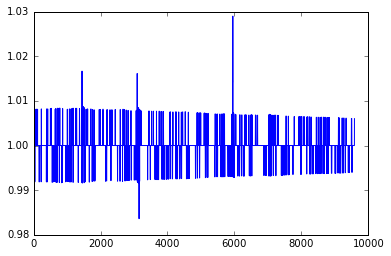

In [427]:
plt.plot(heart_rate_ratio, 'b'); plt.show()

In [429]:
sum = 0
for i in range(len(heart_rate_ratio)):
    if heart_rate_ratio[i] != 1:
        sum += 1

In [430]:
sum / len(heart_rate_ratio) * 100.

16.160667709963484

In [431]:
sum

1549

In [432]:
flash_schema = list_split_on_newline[1].split(',')[0]

In [433]:
flash_schema

'35'

In [474]:
cd = dict([('content', content_list)])

In [481]:
json.dumps(cd)

'{"content": [[NaN, NaN, 0.015632374212145805, 0.003963050898164511, 121, 55.0, 1452015139000, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.01533860806375742, 0.0039235670119524, 121, 55.0, 1452015139200, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.015501951798796654, 0.003949806559830904, 121, 55.0, 1452015139400, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.01567172445356846, 0.003972751088440418, 121, 55.0, 1452015139600, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.0153585784137249, 0.00393498782068491, 121, 55.0, 1452015139800, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.015439288690686226, 0.003938542678952217, 121, 55.0, 1452015140000, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.015645842999219894, 0.00396966515108943, 121, 55.0, 1452015140200, 1.0230000000000001, 128, 0.031, null], [NaN, NaN, 0.01538205984979868, 0.003943748772144318, 121, 55.0, 1452015140400, 1.0230000000000001, 128, 0.031, null], [NaN, NaN, 0.0154112745076417

In [499]:
oxy_file.json()['result']

{'content': [[None,
   None,
   0.015632374212145805,
   0.003963050898164511,
   121,
   None,
   1452015139635,
   1.023,
   0,
   None,
   None],
  [None,
   None,
   0.01533860806375742,
   0.0039235670119524,
   121,
   None,
   1452015139822,
   1.023,
   128,
   0,
   None],
  [None,
   None,
   0.015501951798796654,
   0.003949806559830904,
   121,
   None,
   1452015140020,
   1.023,
   128,
   0,
   None],
  [None,
   None,
   0.01567172445356846,
   0.003972751088440418,
   121,
   55,
   1452015140212,
   1.023,
   128,
   0,
   None],
  [None,
   None,
   0.0153585784137249,
   0.00393498782068491,
   121,
   55,
   1452015140412,
   1.023,
   128,
   0,
   None],
  [None,
   None,
   0.015439288690686226,
   0.003938542678952217,
   121,
   55,
   1452015140603,
   1.023,
   128,
   0,
   None],
  [None,
   None,
   0.015645842999219894,
   0.00396966515108943,
   121,
   55,
   1452015140796,
   1.023,
   128,
   0.03125,
   None],
  [None,
   None,
   0.0153820598497986

In [519]:
session_type = list_split_on_newline[1].split(',')[6]

In [520]:
session_type

'2'

In [521]:
if session_type == '2':
    sport_type = 'bike'
elif session_type == '1':
    sport_type = 'run'
else:
    sport_type = 'unknown'

In [522]:
sport_type

'bike'

In [507]:
fw_revision = list_split_on_newline[1].split(',')[7]

In [509]:
session_type

'2'

In [525]:
sport_type

'bike'

In [523]:
device_id = list_split_on_newline[1].split(',')[4]
device_id = device_id.replace('-', '')

In [524]:
device_id

'0CEFAF810AF6'

In [536]:
assessment = {}
assessment['error'] = {}
assessment['meta'] = {}
assessment['result'] = {}
assessment['result']['content'] = content_list
assessment['result']['device'] = {'model': 'iPad2,5', 'os': 'iOS 9.2'}
assessment['result']['header'] = {'Device_id': device_id,
                    'FW_version': fw_revision,
                    'Schema_version': '1.0.0',
                    'app_version_code': '2.0.2.2',
                    'app_version_name': '2.0.2',
                    'ble_issued_start_time_ant': 999999999,
                    'ble_issued_start_time_ant_tz': -24,
                    'ble_issued_start_time_utc': start_ts,
                    'sample_rate': '2Hz',
                    'sport': sport_type}
assessment['result']['profile'] = {'days_per_week': 6,
                     'distance_per_week': 100,
                     'gender': 'male',
                     'height': 170.0,
                     'months_training': 12,
                     'weight': 72.0}
assessment['result']['protocol'] = {'anticipated_stage': 8,
                      'anticipated_stage_range': 1,
                      'calibration_period': [[180, 60]],
                      'optional': [],
                      'stages': [[180, 80],
                                 [180, 100],
                                 [180, 120],
                                 [180, 140],
                                 [180, 160],
                                 [180, 180],
                                 [180, 200],
                                 [180, 220],
                                 [180, 240],
                                 [180, 260],
                                 [180, 280],
                                 [180, 300],
                                 [180, 320],
                                 [180, 340],
                                 [180, 360],
                                 [180, 380],
                                 [180, 400],
                                 [180, 420],
                                 [180, 440],
                                 [180, 460]]}

In [543]:
json.dumps(assessment)

'{"result": {"device": {"os": "iOS 9.2", "model": "iPad2,5"}, "protocol": {"anticipated_stage_range": 1, "anticipated_stage": 8, "calibration_period": [[180, 60]], "optional": [], "stages": [[180, 80], [180, 100], [180, 120], [180, 140], [180, 160], [180, 180], [180, 200], [180, 220], [180, 240], [180, 260], [180, 280], [180, 300], [180, 320], [180, 340], [180, 360], [180, 380], [180, 400], [180, 420], [180, 440], [180, 460]]}, "profile": {"height": 170.0, "distance_per_week": 100, "days_per_week": 6, "gender": "male", "months_training": 12, "weight": 72.0}, "content": [[NaN, NaN, 0.015632374212145805, 0.003963050898164511, 121, 55.0, 1452015139000, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.01533860806375742, 0.0039235670119524, 121, 55.0, 1452015139200, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.015501951798796654, 0.003949806559830904, 121, 55.0, 1452015139400, 1.0230000000000001, 128, "None", null], [NaN, NaN, 0.01567172445356846, 0.003972751088440418, 121, 55.0

In [544]:
pwd

'/Users/todd/code/AnalysisTools/scripts'

In [545]:
with open('test.oxy', 'w') as outfile:
    json.dump(assessment, outfile)

In [546]:
def getDevAccessToken():
    """Return the authorization token for development."""
    r = requests.post('http://devapi.bsxinsight.com/access-token',
            data={'client_id': 'WEf7lFXcARobgUqG',
                  'client_secret': 'mV1YoPTAFyWibtu0O5pOQQKPHkAq2ITv',
                  'grant_type': 'client_credentials',
                  'scope': 'matlab'})
    access_token = r.json()['access_token']
    return access_token

In [547]:
dev_access_token = getDevAccessToken()

In [548]:
dev_access_token

'lvXKJUEkAHnWUlml1qsxvtEgXTuopeKHjmWZUN4E'

In [549]:
def putDataToDev(file_name, dev_access_token):
    """Read oxy file from disk, write to development account."""
    data_file = 'test.oxy'
    try:
        files = {'oxy_data': open(data_file, 'rb')}
        r = requests.put('http://devapi.bsxinsight.com/assessments/' +
                         new_assessment_id,
                         files=files,
                         headers={'Authorization': dev_access_token})
    except:
        print("Local oxy data file not found or not readable.")
    return r.status_code

In [550]:
putDataToDev('test.oxy', dev_access_token)

Local oxy data file not found or not readable.


UnboundLocalError: local variable 'r' referenced before assignment

In [551]:
pwd

'/Users/todd/code/AnalysisTools/scripts'

In [552]:
ls

568bfe39adac181d798b4569.csv  bsxcsv_to_oxy.ipynb           parameters.cfg
568bfe39adac181d798b4569.oxy  createOxyFileFromBSXCSV.py*   schema/
analyzeAssessments.py*        getDeviceData.py*             test.oxy


In [557]:
caldwell_activity = pd.read_csv('/Users/todd/Downloads/56966729adac186c6a8b4567.csv', skiprows=5)

In [563]:
caldwell_smo2 = caldwell_activity['1.2'].dropna(how='any')

In [564]:
caldwell_smo2

13      70.9
14      70.0
15      69.7
16      70.0
17      69.8
18      69.7
19      69.7
20      69.6
21      69.5
22      69.7
23      70.1
24      70.7
25      71.2
26      71.8
27      72.3
28      72.9
29      73.2
30      73.2
31      72.8
32      72.4
33      72.0
34      71.5
35      71.0
36      70.4
37      69.9
38      69.4
39      68.8
40      68.6
41      68.6
42      68.8
        ... 
2622    74.8
2623    74.7
2624    75.1
2625    75.5
2626    75.9
2627    76.1
2628    76.2
2629    76.2
2630    75.8
2631    75.2
2632    74.6
2633    74.5
2634    74.8
2635    75.5
2636    76.2
2637    76.7
2638    76.8
2639    76.8
2640    76.8
2641    76.7
2642    76.5
2643    76.3
2644    76.2
2645    76.3
2646    76.4
2647    76.5
2648    76.6
2649    76.6
2650    76.7
2651    76.6
Name: 1.2, dtype: float64

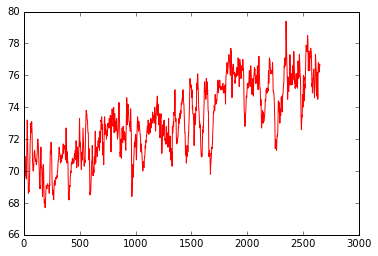

In [565]:
plt.plot(caldwell_smo2, 'r'); plt.show()

In [571]:
print(caldwell_smo2.min(), caldwell_smo2.max(), caldwell_smo2.mean(), caldwell_smo2.std())

67.7 79.4 73.17483895414938 2.319225226385609
